In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [2]:
gensim.__version__

'4.3.0'

In [3]:
np.random.seed(42)

In [4]:
import gensim.downloader as api

In [5]:
wv = api.load('glove-twitter-50')

In [6]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [7]:
wv['apple'].shape

(50,)

In [8]:
len(wv['apple'])

50

In [9]:
wv.similarity("apple", "mango")

0.52897877

In [10]:
wv.similarity("communism", "car")

0.0064160377

In [11]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('truck', 0.8638960719108582), ('driving', 0.8150991201400757), ('airplane', 0.8137863874435425), ('parked', 0.8027330636978149), ('drove', 0.8020968437194824)]


In [12]:
# wv.save('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')
#from gensim.models import KeyedVectors
#wv = KeyedVectors.load('/content/drive/MyDrive/Content Creation/Youtube Tutorials/vectors.kv')

In [13]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

sea


In [14]:
words = ["one",'two','man','woman','table']

In [15]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.2804223 ,  1.5896978 ],
       [ 0.5923978 ,  1.9831201 ],
       [-2.577764  , -1.6972469 ],
       [-1.0547671 , -0.25685552],
       [ 3.3205562 , -1.6187147 ]], dtype=float32)

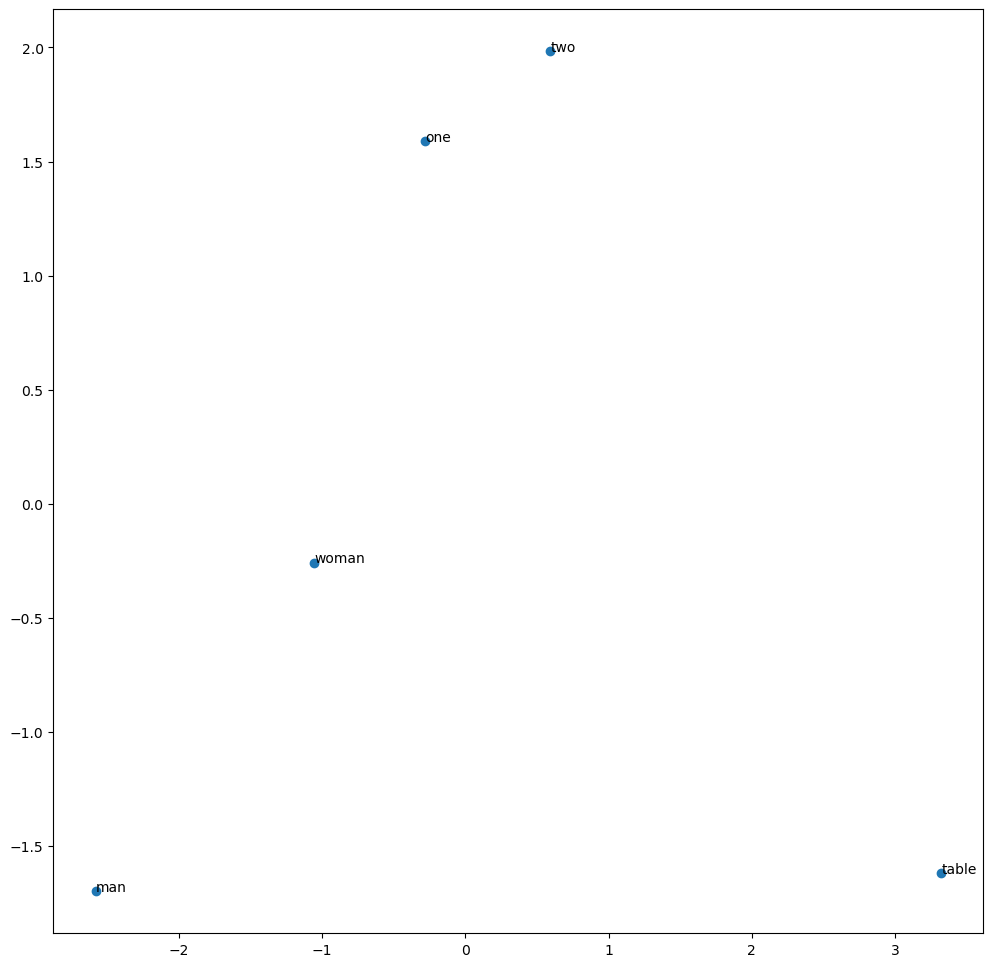

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [17]:
data = pd.read_csv("D:\\Data\\NLP\\pradip\\toxic_commnets.csv",on_bad_lines='error',skiprows = range(1000, 159570), engine="python")
data.tail()

,comment_text,toxic
996,It is common knowledge that Karaims (but not K...,0
997,", 12 April 2006 (UTC)\nThen rewrite and expand...",0
998,"""I was trying to inject some humour (as eviden...",0
999,And it looks like it was actually you who put ...,0
1000,"""\nAnd ... I really don't think you understand...",0


In [18]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [19]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [20]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'others', 'as', 'many', 'though', 'any', 'or', 'had', 'us', 'else', 'under', 'why', 'forty', 'could', 'also', 'me', 'there', 'made', 'say', 'give', 'further', 'although', 'someone', 'somehow', 'fifty', 'full', 'whereby', 'around', 'another', 'nor', 'indeed', 'are', 'becomes', 'former', 'whoever', 'were', 'much', 'same', '’ll', 'every', 'besides', 'last', '’s', 'first', 'i', 'everyone', 'part', 'even', 'well', 'against', 'moreover', 're', 'have', 'neither', 'thereafter', 'you', 'when', 'anyhow', 'therein', 'few', 'here', 'out', 'the', '‘re', 'a', 'below', 'them', 'up', 'all', 'who', 'hereby', 'an', 'whole', 'thereupon', 'rather', '‘ll', 'from', 'nevertheless', 'still', 'he', 'at', 'should', 'onto', 'her', 'sometimes', 'my', 'whether', 'cannot', 'into', 'either', 'nobody', 'yet', 'among', 'alone', 'less', 'top', 'beforehand', 'everything', 'however', 'since', 'become', 'bottom', 'it', 'than', 'see', 'anything', 'its', 'for', 'already', 'again', 'two', 'third', 'through', 'everywhere', '

In [21]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [23]:
data.tail()

,comment_text,toxic,tokens
996,It is common knowledge that Karaims (but not K...,0,"[common, knowledge, karaims, karaite, jews, bo..."
997,", 12 April 2006 (UTC)\nThen rewrite and expand...",0,"[12, april, 2006, utc, rewrite, expand, articl..."
998,"""I was trying to inject some humour (as eviden...",0,"[try, inject, humour, evidence, winky, face, r..."
999,And it looks like it was actually you who put ...,0,"[look, like, actually, speedy, version, delete..."
1000,"""\nAnd ... I really don't think you understand...",0,"[..., think, understand, come, idea, bad, righ..."


In [24]:
data['vec'] = data['tokens'].apply(sent_vec)

In [25]:
data.tail()

,comment_text,toxic,tokens,vec
996,It is common knowledge that Karaims (but not K...,0,"[common, knowledge, karaims, karaite, jews, bo...","[0.1309487509308383, 0.21662285118363797, -0.0..."
997,", 12 April 2006 (UTC)\nThen rewrite and expand...",0,"[12, april, 2006, utc, rewrite, expand, articl...","[0.3409243705808311, 0.08504862262791879, -0.2..."
998,"""I was trying to inject some humour (as eviden...",0,"[try, inject, humour, evidence, winky, face, r...","[0.48384144321522293, 0.3974905873275181, -0.0..."
999,And it looks like it was actually you who put ...,0,"[look, like, actually, speedy, version, delete...","[-0.07601512782275677, 0.12494449876248837, -0..."
1000,"""\nAnd ... I really don't think you understand...",0,"[..., think, understand, come, idea, bad, righ...","[0.29265500884503126, 0.1710946881212294, 0.04..."


In [26]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [29]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9552238805970149
Logistic Regression Precision: 0.9285714285714286
Logistic Regression Recall: 0.6190476190476191
